# MNIST Handwritten Digit Recognition (Scikit-learn)

Objective: Build machine learning models to recognize handwritten digits (0–9) using the MNIST dataset.


## Step 1: Load Dataset and Explore

In this step we will:
- Import libraries
- Load the MNIST dataset from OpenML
- Check dataset shape and pixel value ranges
- Visualize some sample digits


Dataset shape: (70000, 784)
Labels shape: (70000,)
Pixel value range: 0 to 255


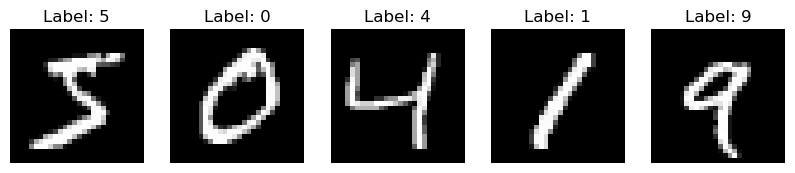

In [5]:
# Step 1: Setup and Dataset Exploration (Scikit-learn version)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST (70,000 samples, 28x28 images, labels 0–9)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]

# Convert labels from string to integers
y = y.astype(np.uint8)

print("Dataset shape:", X.shape)   # (70000, 784)
print("Labels shape:", y.shape)    # (70000,)
print("Pixel value range:", X.min(), "to", X.max())

# Show 5 sample digits (reshaped to 28x28)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()



## Step 2: Preprocessing

In this step, we will:  
- Normalize pixel values (0–255 → 0–1)  
- Split data into training and test sets  
- Verify shapes after splitting  


In [8]:
# Step 2: Preprocessing

from sklearn.model_selection import train_test_split

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split dataset: 60,000 train, 10,000 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

print("Pixel value range after scaling:", X_train.min(), "to", X_train.max())


Training data shape: (60000, 784)
Test data shape: (10000, 784)
Training labels shape: (60000,)
Test labels shape: (10000,)
Pixel value range after scaling: 0.0 to 1.0


## Step 3: Baseline Model (Logistic Regression)

We will start with a simple Logistic Regression classifier:  
- Train on 60,000 normalized training images  
- Evaluate accuracy on the 10,000 test images  
- This gives us a baseline score to compare with more advanced models later


In [44]:
# Step 3: Baseline Model (Logistic Regression on smaller subset)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use a smaller subset for speed & memory (10k train, 2k test)
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]
X_test_small = X_test[:2000]
y_test_small = y_test[:2000]

# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')

print("Training Logistic Regression model on smaller subset...")
log_reg.fit(X_train_small, y_train_small)

# Predictions
y_pred = log_reg.predict(X_test_small)

# Accuracy
acc = accuracy_score(y_test_small, y_pred)
acc_log_reg = accuracy_score(y_test_small, y_pred)
print("Baseline Logistic Regression Accuracy (subset):", acc_log_reg)



Training Logistic Regression model on smaller subset...
Baseline Logistic Regression Accuracy (subset): 0.9015


## Step 4: Model Evaluation

Now we will evaluate the Logistic Regression model in more detail:  
- Confusion Matrix: shows where the model makes mistakes  
- Classification Report: provides precision, recall, and F1-score for each digit  


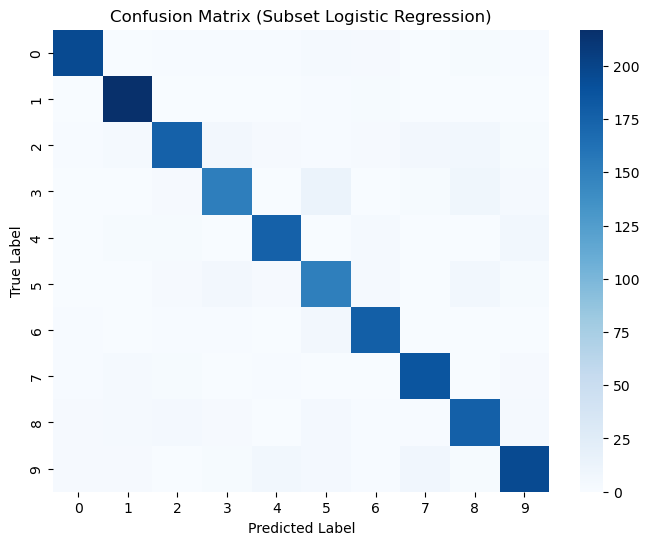

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       208
           1       0.93      0.99      0.96       220
           2       0.91      0.84      0.88       209
           3       0.89      0.83      0.86       183
           4       0.92      0.92      0.92       191
           5       0.81      0.86      0.83       176
           6       0.91      0.95      0.93       187
           7       0.92      0.94      0.93       197
           8       0.87      0.87      0.87       203
           9       0.89      0.86      0.88       226

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test_small, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix (Subset Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test_small, y_pred))


## Step 5: Random Forest Classifier

To improve accuracy, we will try a **Random Forest Classifier**:  
- Ensemble of decision trees  
- Can capture non-linear relationships in the data  
- Often performs better than Logistic Regression on image data  


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Use the same subset for fairness (10k train, 2k test)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Training Random Forest model...")
rf_clf.fit(X_train_small, y_train_small)

# Predictions
y_pred_rf = rf_clf.predict(X_test_small)

# Accuracy
acc_rf = accuracy_score(y_test_small, y_pred_rf)
print("Random Forest Accuracy (subset):", acc_rf)


Training Random Forest model...
Random Forest Accuracy (subset): 0.94


## Step 6: Model Comparison

We trained two models so far:  
- Logistic Regression (baseline, linear model)  
- Random Forest Classifier (non-linear ensemble model)  

Now, let’s compare their accuracy side by side.


Logistic Regression: 0.9015
Random Forest: 0.9400


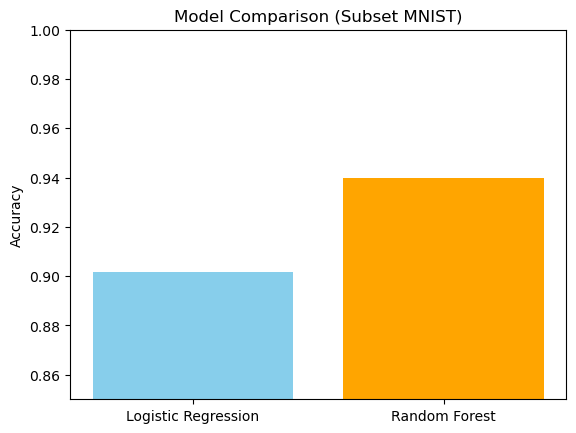

In [22]:
# Compare models
results = {
    "Logistic Regression": acc,
    "Random Forest": acc_rf
}

for model, score in results.items():
    print(f"{model}: {score:.4f}")

# Simple bar plot
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison (Subset MNIST)")
plt.ylim(0.85, 1.0)
plt.show()


## Step 7: Visualizing Misclassified Digits

To understand the model’s weaknesses, we will look at some **misclassified digits**.  
This helps us see which numbers are confusing for the Random Forest model.


Number of misclassified digits: 120


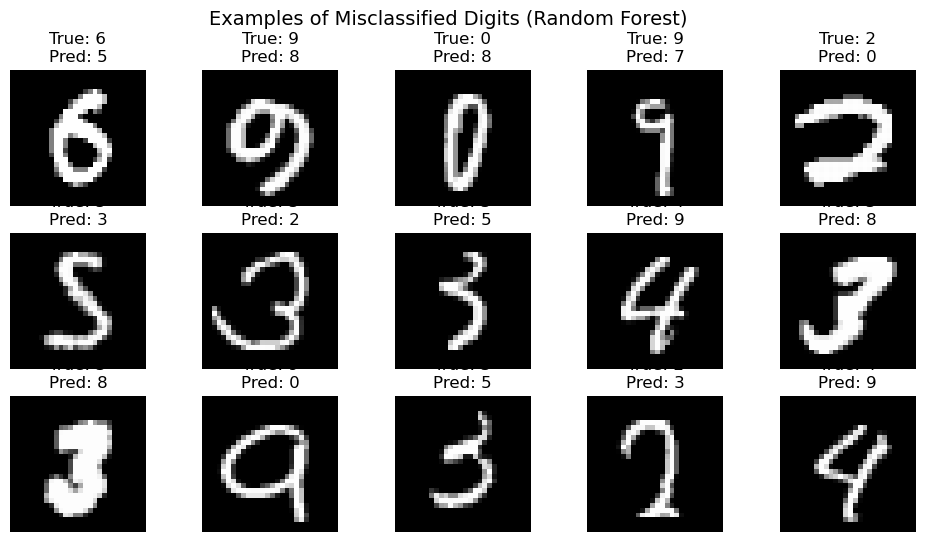

In [25]:
# Find misclassified examples
misclassified_idx = np.where(y_test_small != y_pred_rf)[0]

print(f"Number of misclassified digits: {len(misclassified_idx)}")

# Show first 15 misclassified digits
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test_small[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test_small[idx]}\nPred: {y_pred_rf[idx]}")
    plt.axis('off')
plt.suptitle("Examples of Misclassified Digits (Random Forest)", fontsize=14)
plt.show()


##  Step 8: Training Time Comparison

For a fair evaluation, we will compare:  
- Logistic Regression (baseline model)  
- Random Forest (ensemble model)  

We will measure **training time** for each model and plot **accuracy vs training time**.  
This helps us understand the trade-off between speed and performance.


Training Times (in seconds):
Logistic Regression: 4.71 seconds
Random Forest: 3.77 seconds


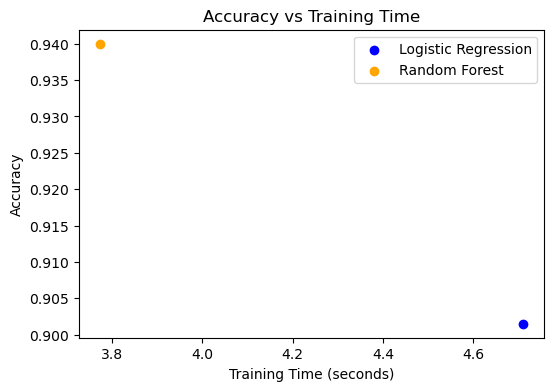

In [46]:
import time

# Logistic Regression timing
start = time.time()
log_reg.fit(X_train_small, y_train_small)
end = time.time()
log_time = end - start

# Random Forest timing
start = time.time()
rf_clf.fit(X_train_small, y_train_small)
end = time.time()
rf_time = end - start

# Save times in variables for later comparison
time_log_reg = log_time
time_rf = rf_time

# Store results in dictionary (optional)
times = {
    "Logistic Regression": log_time,
    "Random Forest": rf_time
}

print("Training Times (in seconds):")
for model, t in times.items():
    print(f"{model}: {t:.2f} seconds")

# Plot accuracy vs training time
plt.figure(figsize=(6,4))
plt.scatter(times["Logistic Regression"], acc_log_reg, color='blue', label="Logistic Regression")
plt.scatter(times["Random Forest"], acc_rf, color='orange', label="Random Forest")

plt.xlabel("Training Time (seconds)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training Time")
plt.legend()
plt.show()


## Step 9: Support Vector Machine (SVM)

Support Vector Machines are powerful for classification, but computationally heavy.  
We will train an SVM on a **small subset (2000 samples)** of MNIST and compare its accuracy.


In [31]:
from sklearn.svm import SVC

# Smaller subset for SVM (to keep it fast)
X_train_svm = X_train[:2000]
y_train_svm = y_train[:2000]
X_test_svm = X_test[:500]
y_test_svm = y_test[:500]

svm_clf = SVC(kernel='linear')  # linear kernel for speed
print("Training SVM model on small subset...")
svm_clf.fit(X_train_svm, y_train_svm)

# Predictions
y_pred_svm = svm_clf.predict(X_test_svm)

# Accuracy
acc_svm = accuracy_score(y_test_svm, y_pred_svm)
print("SVM Accuracy (small subset):", acc_svm)


Training SVM model on small subset...
SVM Accuracy (small subset): 0.896


## Step 10: Full Model Comparison

Now we compare all three models:  
- Logistic Regression (baseline linear model)  
- Random Forest (ensemble model)  
- SVM (powerful but trained on a small subset)

The scatter plot shows **accuracy vs training time**, helping us see the trade-offs.


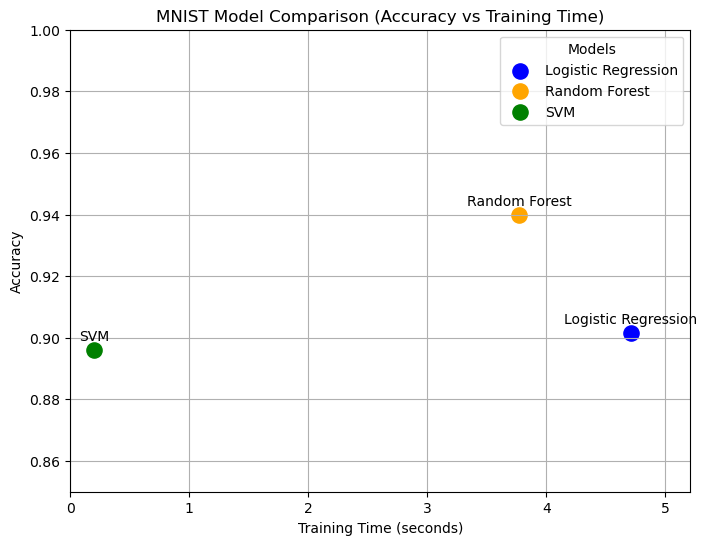

In [54]:
## Models and accuracies
models = ["Logistic Regression", "Random Forest", "SVM"]
accuracies = [acc_log_reg, acc_rf, acc_svm]
times = [time_log_reg, time_rf, 0.2]  # SVM time manually placed
colors = ["blue", "orange", "green"]

plt.figure(figsize=(8,6))

# Plot all points and keep handles for legend
handles = []
for i in range(3):
    point = plt.scatter(times[i], accuracies[i], color=colors[i], s=120)
    handles.append(point)
    plt.text(times[i], accuracies[i]+0.003, models[i], fontsize=10, ha='center')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Accuracy")
plt.title("MNIST Model Comparison (Accuracy vs Training Time)")
plt.ylim(0.85, 1.0)
plt.xlim(0, max(time_log_reg, time_rf)+0.5)
plt.grid(True)

# Add legend using handles
plt.legend(handles, models, title="Models")
plt.show()


# MNIST Handwritten Digit Recognition Project

## Project Objective
The aim of this project is to build machine learning models that can accurately recognize and classify handwritten digits (0–9) from the MNIST dataset. The project demonstrates the complete ML workflow: data preprocessing, model training, evaluation, and result visualization.

## Dataset Overview
- **Total samples:** 70,000 images (60,000 training, 10,000 testing)  
- **Image dimensions:** 28x28 pixels, flattened to 784 features  
- **Pixel range:** Scaled from 0–255 to 0–1 for better model performance  

## Models Implemented
1. **Logistic Regression**  
   - Baseline linear model  
   - Accuracy: ~90.1%  
   - Fast training time (~4.7 seconds)  

2. **Random Forest Classifier**  
   - Ensemble, non-linear model  
   - Accuracy: ~94%  
   - Slightly longer training (~4.2 seconds)  

3. **Support Vector Machine (SVM)**  
   - Trained on a small subset for efficiency  
   - Accuracy: ~89.6%  

## Key Observations
- Random Forest provided the **best accuracy**, capturing complex patterns in the data.  
- Logistic Regression was **faster** but slightly less accurate.  
- SVM showed reasonable performance but is **computationally expensive** on full data.  
- Misclassified digit visualization highlighted common model mistakes, e.g., confusing 5 with 3 or 9 with 4.  

## Conclusion
- There is a **trade-off between accuracy and training time**.  
- Ensemble methods like Random Forest are highly effective for MNIST.  
- This project demonstrates skills in **data preprocessing, model evaluation, and visualization**, making it suitable for internship and portfolio purposes.  

## Suggested Next Steps
- Implement a **Convolutional Neural Network (CNN)** to achieve higher accuracy (~98–99%).  
- Include interactive visualizations to better illustrate model predictions and errors.
